In [ ]:
import re
import string
import pandas as pd

import csv
import json
import glob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/Diploma_paper/out_nerel_inference_new.txt') as f:
  text = f.read()

Let us make a list of predictions

In [ ]:
text_list = text.split('*=*=*=*=*=*=*=*=*=*=')

Let us remove empty predictions (but not false empty predictions)

In [ ]:
text_list_ent = []
for i in text_list:
  # if (re.findall('\nModel true: \[]', i) == []) and (re.findall('\nModel predict: \[]', i) == []) or (re.findall('\nModel true: \[]', i) != []) and (re.findall('\nModel predict: \[]', i) == []) or (re.findall('\nModel true: \[]', i) == []) and (re.findall('\nModel predict: \[]', i) != []):
    text_list_ent.append(i)


Number of sentences 

In [ ]:
len(text_list)//29

1126

Create list of entity names

In [ ]:
entities = {"PERSON": "Найди в тексте обозначение человека, человеческого существа, имени или фамилии",
"PROFESSION": "Найти в тексте обозначение рода трудовой деятельности человека, обозначение труда или занятия, за которое человек получает оплату",
"ORGANIZATION": "Найди в тексте обозначение производственного образования, сформированного из людей, деятельность которых координируется руководством для достижения общей цели",
"EVENT": "Найди в тексте обозначение значимого явления, которое произошло в некоторый момент времени",
"DATE": "Найди в тексте временную запись, включающую в себя число месяца, месяц или год",
"COUNTRY": "Найди в тексте обозначение территории, имеющей политические, географические, культурные и исторические границы",
"CITY": "Найди в тексте обозначение крупного населенного пункта, административного, торгового, промышленного и культурного центра",
"NUMBER": "Найди в тексте обозначение количества или обозначение математической величины, при помощи которой производится счет",
"AGE": "Найди в тексте обозначение возраста или обозначение количества лет",
"ORDINAL": "Найди в тексте обозначение порядкового номера",
"AWARD": "Найди в тексте обозначение приза, получаемого победителем соревнования, или обозначение награды за успехи",
"STATE_OR_PROVINCE": "Найди в тексте обозначение территориальной административной единицы в пределах государства или страны",
"NATIONALITY": "Найди в тексте обозначение принадлежности индивида к национальной или этнической группе, народности, нации, обозначение гражданства или юридической принадлежности к тому или иному государству",
"FACILITY": "Найди в тексте обозначение коммерческого или административного здания",
"LAW": "Найди в тексте обозначение правила или нормативно-правового акта, который принимается законодательным органом государственной власти и регулирует определённые общественные отношения",
"WORK_OF_ART": "Найди в тексте обозначение произведения художественного творчества или иного материального продукта деятельности человека, имеющего определенную ценность",
"CRIME": "Найди в тексте обозначение правонарушения или общественно опасного деяния, совершение которого влечёт применение мер уголовной ответственности",
"DISEASE": "Найди в тексте обозначение расстройства здоровья, нарушающего деятельность организма или его отдельных органов",
"LOCATION": "Найди в тексте обозначение места или местоположения какого-либо объекта или предмета", 
"IDEOLOGY": "Найди в тексте обозначение системы взглядов и идей, характеризующих какую-либо социальную группу, класс, политическую партию или сообщество",
"PRODUCT": "Найди в тексте обозначение какого-либо предмета или результата человеческого труда, например, обработки, переработки, исследования",
"PENALTY": "Найди в тексте обозначение меры воздействия на того, кто совершил правонарушение или преступление",
"TIME": "Найди в тексте обозначение продолжительности, длительности чего-либо, измеряемого секундами, минутами, часами",
"MONEY": "Найди в тексте обозначение меры стоимости товаров или услуг, используемой для обмена",
"DISTRICT": "Найди в тексте обозначение административно-территориальной единицы или обозначение части города и страны",
"RELIGION": "Найди в тексте обозначение системы взглядов, обусловленной верой в сверхъестественное, включающей в себя свод моральных норм и обрядов, и объединяющей людей в институты",
"PERCENT": "Найди в тексте обозначение одной сотой части чего-либо, используемой для обозначения доли чего-либо по отношению к целому",
"LANGUAGE": "Найди в тексте обозначение сложной знаковой системы, естественно или искусственно созданной для коммуникации между людьми",
"FAMILY": "Найди в тексте обозначение основанной на браке или кровном родстве малой группы людей, члены которой связаны общностью быта, взаимной ответственностью и взаимопомощью"
 }

In [ ]:
entity_names = entities.keys()

Let us count how many entities of each type were found (number of predictions)

In [ ]:
text_list_count = []
for i in text_list:
  if (re.findall('\nModel true: \[]', i) == []) and (re.findall('\nModel predict: \[]', i) == []):
    text_list_count.append(i)

In [ ]:
entity_count = {}
for i in entity_names:
  entity_count[i] = 0

for i in text_list_count:
  for j in entity_names:
    if re.findall(j, i) != []:
      entity_count[j] += 1


In [ ]:
entity_count

{'AGE': 117,
 'AWARD': 49,
 'CITY': 160,
 'COUNTRY': 293,
 'CRIME': 18,
 'DATE': 418,
 'DISEASE': 27,
 'DISTRICT': 10,
 'EVENT': 299,
 'FACILITY': 24,
 'FAMILY': 1,
 'IDEOLOGY': 31,
 'LANGUAGE': 5,
 'LAW': 22,
 'LOCATION': 24,
 'MONEY': 30,
 'NATIONALITY': 37,
 'NUMBER': 134,
 'ORDINAL': 65,
 'ORGANIZATION': 347,
 'PENALTY': 7,
 'PERCENT': 6,
 'PERSON': 549,
 'PRODUCT': 32,
 'PROFESSION': 379,
 'RELIGION': 15,
 'STATE_OR_PROVINCE': 75,
 'TIME': 32,
 'WORK_OF_ART': 31}

Create a plot

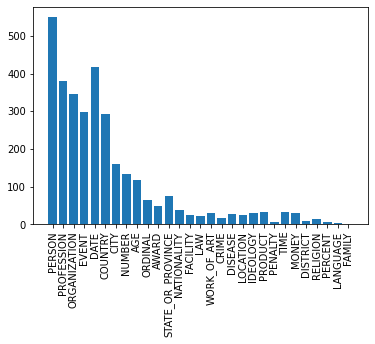

In [ ]:
import matplotlib.pyplot as plt

names = list(entity_count.keys())
values = list(entity_count.values())

plt.bar(range(len(entity_count)), values, tick_label=names)
plt.xticks(range(len(entity_count)), names, rotation='vertical')
plt.show()

We can see, that top 5 entities found are: Person, Profession, Organization, Event, Date

Let us look more close

In [ ]:
entity_dict = {}
for i in entity_names:
  entity_dict[i] = []
  
for i in text_list_ent:
  for j in entity_names:
    if re.findall(j, i) != []:
      entity_dict[j].append(i)

In [ ]:
for elem in entities.keys():
  for i, el in enumerate(entity_dict[elem]):
   entity_dict[elem][i] = el[(len(entities[elem])+14):]

In [ ]:
# for i, el in enumerate(entity_dict['FAMILY']):
#   print(entity_dict['FAMILY'][i])


In [ ]:
replace = []
for elem in entity_dict.keys():
  for i, el in enumerate(entity_dict[elem]):
    replace = re.findall('%%.*?\n', el)
    new_str = el
    for j in replace:
        new_str = new_str.replace(j,'')
    entity_dict[elem][i] = new_str



In [ ]:
for el in entity_dict:
  for idx, elem in enumerate(entity_dict[el]):
    entity_dict[el][idx] = elem.split('\n')[:-1]
  # for j in i.split('\n'):
  #   print('-',j)

In [ ]:
import ast
import pandas as pd

res = {}
for key in entity_dict:
  df = pd.DataFrame(columns=['context', 'true', 'predict', 'TP', 'possible', 'actual'])
  for el in entity_dict[key]:
    el[1] = el[1].replace('Model true: ','')
    el[2] = el[2].replace('Model predict: ','')

    el[1] = ast.literal_eval(el[1])
    el[2] = ast.literal_eval(el[2])
    df = df.append({'context':el[0], 'true': el[1], 'predict':el[2]}, ignore_index=True)
  res[key] = df


In [ ]:
import copy
# def give_me_TP(row):
#   # return len(list(set(row['true']) & set(row['predict'] ))) > 0
#   return (len(row['true']) > 0) & (len(row['predict']) > 0)
# def give_me_TN(row):
#   return (len(row['true']) == 0) & (len(row['predict']) == 0)
# def give_me_FP(row):
#   return (len(row['true']) == 0) & (len(row['predict']) > 0)
# def give_me_FN(row):
#   return (len(row['true']) > 0) & (len(row['predict']) == 0)
def give_me_TP(row):
  res = 0
  for x in list(set(row['true'])):
    for y in list(set(row['predict'])):
      if x == y:
        res += 1
  return res
def give_me_possible_num(row):
  return len(row['true'])
def give_me_actual_num(row):
  return len(row['predict'])


res_score = pd.DataFrame(columns=['Label', 'TP', 'possible', 'actual', 'precision', 'recall', 'f1'])

for key in res:
  df = res[key]
  for index, row in df.iterrows():
    row['TP'] = give_me_TP(row)
    row['possible'] = give_me_possible_num(row)
    row['actual'] = give_me_actual_num(row)
  overall = df[['TP', 'possible', 'actual']].sum(axis=0)
  precision = overall['TP']/overall['actual']
  recall = overall['TP']/overall['possible']
  f1 = 2*precision*recall/(precision + recall + 1e-10)
  res_score = res_score.append({
                          'Label': key,
                          'TP': overall['TP'], 
                          'possible': overall['possible'], 
                          'actual': overall['actual'],
                          'precision': precision,
                          'recall': recall,
                          'f1': f1}, ignore_index=True)


In [ ]:
res_score.sort_values(['f1'])

,Label,TP,possible,actual,precision,recall,f1
28,FAMILY,1,13,4,0.250000,0.076923,0.117647
21,PENALTY,7,18,14,0.500000,0.388889,0.437500
13,FACILITY,29,63,64,0.453125,0.460317,0.456693
18,LOCATION,24,61,41,0.585366,0.393443,0.470588
24,DISTRICT,11,25,17,0.647059,0.440000,0.523810
15,WORK_OF_ART,42,92,64,0.656250,0.456522,0.538462
16,CRIME,24,35,52,0.461538,0.685714,0.551724
3,EVENT,348,659,561,0.620321,0.528073,0.570492
10,AWARD,75,121,131,0.572519,0.619835,0.595238
14,LAW,35,62,55,0.636364,0.564516,0.598291


In [ ]:
res['AGE'][120:140]

,context,true,predict,TP,possible,actual
120,5 марта 2019 года титэцу ватанабэ отметил сво...,"[(24, 29, 112 - и день рождения, AGE)]",[],0,1,0
121,"когда ватанабэ было 107 лет, в ответ на вопро...","[(17, 19, 107 лет, AGE)]","[(17, 19, 107 лет, AGE)]",1,1,1
122,"113 - летнии масадзо нонака, которыи в апреле...","[(12, 16, 113 - летнии, AGE)]","[(12, 16, 113 - летнии, AGE)]",1,1,1
123,"самым старым из когда - либо живших мужчин, п...","[(37, 42, 116 лет и 54 дня, AGE)]",[],0,1,0
124,самым пожилым нынеживущим человеком на земле ...,"[(32, 35, 117 - летняя, AGE)]","[(32, 35, 117 - летняя, AGE)]",1,1,1
125,общепризнанныи рекорд долголетия принадлежит ...,"[(35, 41, 122 лет и 164 днеи, AGE)]","[(35, 37, 122 лет, AGE), (38, 41, 164 днеи, AGE)]",0,1,2
126,советник верховного руководителя страны в воз...,"[(18, 20, 71 года, AGE)]","[(18, 20, 71 года, AGE)]",1,1,1
127,ранее от вируса умерла 23 - летняя футболистк...,"[(16, 19, 23 - летняя, AGE)]","[(16, 19, 23 - летняя, AGE)]",1,1,1
128,ему было 70 лет.,"[(14, 16, 70 лет, AGE)]","[(14, 16, 70 лет, AGE)]",1,1,1
129,филдсовская премия - одна из самых престижных...,"[(33, 37, не старше 40 лет, AGE)]","[(33, 37, не старше 40 лет, AGE)]",1,1,1


In [ ]:
res['AGE']['TN'].sum()


0

In [ ]:
new_result_dict = res